<p style = "font-size : 40px ;text-align: center;color:blue;font-family:TimesNewRoman"><b>CaR PricE PredictioN</b></p>

 <p style = "font-size : 25px ; color: blue;font-family:TimesNewRoman">
    <b>Abstract:</b></p>

A key challenge for car sellers is to determine the sale price of the car. The ability to predict the exact car value is beneficial for car owner as well as for buyers to plan their finances according to the price trend. The car prices depend on the number of features like the car mileage, car power, car year and so on.

# Import Libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load and Explore the data

In [2]:
import os 

os.chdir("C:/Users/Gaurav/Desktop/Data Science/Python/Project")

In [3]:
df_cars = pd.read_csv('used_cars_data.csv')


In [4]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

* There are 7252 rows and 14 columns.
* Columns name have no sapces and special characters.
* There are 9 variable categorical type and 5 variable are numerical type.
* Dependent Variable is "Price"

In [5]:
# Check for data integrity and do missing value imputation

df_cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
#Repalce missing value to nan value
df_cars.replace('null', np.nan, inplace =True)
df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


# Fill null values for "Seats"

In [7]:
# Count for seat
df_cars["Seats"].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [8]:
# Fill Mising value for seat
df_cars["Seats"].fillna(5, inplace = True)

df_cars["Seats"].isnull().sum()


0

In [9]:
# Fix "0 seat count" value by average value "5"
df_cars['Seats'].replace(to_replace =0, value =5, inplace= True)


In [10]:
# Check count of seats
df_cars["Seats"].value_counts()

5.0     6101
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [11]:
df_cars["Seats"].isnull().sum()

0

# Fill null values for "Mileage"

In [12]:
# Split mileage column to give two columns mileage(having mileage and unit)
# for unit
df_cars['Mileage_Mileage'] = df_cars["Mileage"].str.split(expand = True) [0]

df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2


In [13]:
# Split mileage column to give two columns mileage(having mileage and unit)
# for mileage

df_cars['Mileage_Unit'] = df_cars["Mileage"].str.split(expand = True) [1]

df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl


In [14]:
# Replace "km/kg" to "kmpl" in "Mileage_Unit" column

df_cars['Mileage_Unit'].replace(to_replace ='km/kg', value = 'kmpl', inplace= True)

In [15]:
df_cars['Mileage_Unit'].head(3)

0    kmpl
1    kmpl
2    kmpl
Name: Mileage_Unit, dtype: object

In [16]:
# Fill Missing values for "Mileage_unit"

df_cars["Mileage_Unit"].fillna("kmpl", inplace = True)

In [17]:
df_cars["Mileage_Unit"].isnull().sum()

0

### for "Mileage_Mileage" Column

In [18]:
df_cars["Mileage_Mileage"].dtype

dtype('O')

In [19]:
# Convert "Mileage_Mileage" data type str to float for calculation

df_cars["Mileage_Mileage"] = df_cars["Mileage_Mileage"].astype(str).astype(float)

df_cars["Mileage_Mileage"].dtype

dtype('float64')

In [20]:
df_cars['Mileage_Mileage'].max()

33.54

In [21]:
df_cars['Mileage_Mileage'].min()

0.0

In [22]:
# Fill Mising value for "Mileage_Mileage"

df_cars["Mileage_Mileage"].fillna(df_cars['Mileage_Mileage'].mean(), inplace = True)

df_cars["Mileage_Mileage"].isnull().sum()

0

In [23]:
#find count of 0 "mileage" in "Mileage_Mileage" column

aa = df_cars['Mileage_Mileage'].loc[df_cars['Mileage_Mileage'] == 0]

aa.count()

81

In [24]:
# Fix "Mileage_Mileage" = 0 value by average value mean value

df_cars['Mileage_Mileage'].replace(to_replace =0, value = df_cars['Mileage_Mileage'].median(), inplace= True)

In [25]:
# Check to see it replace '0' or not.

df_cars['Mileage_Mileage'].min()

6.4

# Extract the value from 'Name' column


In [26]:

df_cars['brand_name'] = df_cars["Name"].str.split(expand = True) [0]

df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,kmpl,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,Honda


# Extract the value from 'Name' column


In [27]:

df_cars['model_name'] = df_cars["Name"].str.split(expand = True) [1]

df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,kmpl,Maruti,Wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,Honda,Jazz


 # Fill null values for "Engine"

In [28]:
#extract the number value from engine column

df_cars['Engine_cc'] = df_cars["Engine"].str.split(expand = True) [0]

df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,kmpl,Maruti,Wagon,998
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582


In [29]:
# Count of null values in "Engine_cc"
df_cars["Engine_cc"].isnull().sum()

46

In [30]:
# Fill ddata in Engine_cc column
df_cars['Engine_cc'] = df_cars.groupby(by =['brand_name', 'model_name', 'Fuel_Type'])['Engine_cc'].transform(lambda x:x.fillna(x.median()))


In [31]:
# Check Null values in Engine_cc column
df_cars[df_cars['Engine_cc'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,5.0,NaN,40.88,18.16,kmpl,Land,Rover,NaN


In [32]:
# Fill index "1460" in Engine_cc column
cc= df_cars["Engine_cc"].median()

df_cars.loc[1460, "Engine_cc"]= cc

# Check the null values in Engine_cc column
df_cars['Engine_cc'].isnull().sum()

0

 # Fill null values for "Power"


In [33]:
#extract the number value from 'Power' column

df_cars['Power_bph'] = df_cars["Power"].str.split(expand = True) [0]

df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,kmpl,Maruti,Wagon,998,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582,126.2


In [34]:
# convert the missing value into nan value
df_cars['Power_bph'].replace('null', np.nan, inplace =True)
df_cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,kmpl,Maruti,Wagon,998,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582,126.2
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,Honda,Jazz,1199,88.7


In [35]:
# Fill data in Power_bph column

df_cars['Power_bph'] = df_cars.groupby(by =['brand_name', 'model_name', 'Fuel_Type', 'Engine_cc'])['Power_bph'].transform(lambda x:x.fillna(x.median()))

In [36]:
# Check Null values in Engine_cc column
df_cars['Power_bph'].isnull().sum()

71

In [37]:
# Find out median "Power_bph"

df_cars['Power_bph'] = df_cars.groupby(by =['brand_name', 'model_name', 'Fuel_Type'])['Power_bph'].transform(lambda x:x.fillna(x.median()))

In [38]:
# Again Check Null values in Engine_cc column
df_cars['Power_bph'].isnull().sum()

13

In [39]:
df_cars['Power_bph'].median() # for filling null value

92.85

In [40]:
# Fill 13 null values only
df_cars["Power_bph"].fillna(value ="92.85", limit = 13, inplace = True)

In [41]:
# Check Null values in Power_bph column
df_cars['Power_bph'].isnull().sum()

0

# For "Price"

In [42]:
df_cars['Price'].isnull().sum()

1234

In [43]:
# fill values

df_cars['Price'] = df_cars.groupby(["brand_name","model_name", "Year", 'Engine_cc', 'Power_bph'])["Price"].transform(lambda x : x.fillna(x.median()))


In [44]:
# Check null values 
df_cars['Price'].isnull().sum()

272

In [45]:
# fill values (remove "Power_bph") 

df_cars['Price'] = df_cars.groupby(["brand_name","model_name", "Year", 'Engine_cc'])["Price"].transform(lambda x : x.fillna(x.median()))

In [46]:
# Again Check null values 
df_cars['Price'].isnull().sum()

175

In [47]:
# fill values (remove "model_name", "Year", 'Engine_cc')

df_cars['Price'] = df_cars.groupby(["brand_name"])["Price"].transform(lambda x : x.fillna(x.median()))

In [48]:
# Again Check null values 
df_cars['Price'].isnull().sum()

2

In [49]:
# take median
df_cars['Price'].median()

5.53

In [50]:
# check Null records
df_cars[df_cars['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph
6216,6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1 kmpl,1995 CC,null bhp,5.0,NaN,NaN,14.1,kmpl,Hindustan,Motors,1995,92.85
7067,7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2 kmpl,1389 CC,88 bhp,5.0,NaN,NaN,14.2,kmpl,OpelCorsa,1.4Gsi,1389,88


In [51]:
# Fill index "6216 and 7067 " in Price column
cc = df_cars["Price"].median()

df_cars.loc[[6216,7067] , "Price"] = cc



In [52]:
# Check the null values in Engine_cc column
df_cars['Price'].isnull().sum()

0

# Fill null values for "New Price"


In [53]:
#extract the number value from 'New Price' column

df_cars['New_Price_value'] = df_cars["New_Price"].str.split(expand = True) [0]

df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph,New_Price_value
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,5.0,NaN,1.75,26.60,kmpl,Maruti,Wagon,998,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582,126.2,NaN


In [54]:
#extract the number value from 'New Price' column

df_cars['New_Price_unit'] = df_cars["New_Price"].str.split(expand = True) [1]

df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph,New_Price_value,New_Price_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,NaN,1.75,26.60,kmpl,Maruti,Wagon,998,58.16,NaN,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582,126.2,NaN,NaN


In [55]:
# See dtype
df_cars['New_Price_value'].dtype

dtype('O')

In [56]:
# Convert "New_Price_value" data type str to float for calculation

df_cars["New_Price_value"] = df_cars["New_Price_value"].astype(str).astype(float)

print(df_cars['New_Price_value'].dtypes)

float64


In [57]:
# convert the unit "Cr" into "Lakh"

df_cars['New_Price_value'] = np.where((df_cars['New_Price_unit'] == "Cr"), df_cars.New_Price_value*100, df_cars['New_Price_value'])

df_cars['New_Price_value'].head(3)

0     NaN
1     NaN
2    8.61
Name: New_Price_value, dtype: float64

In [58]:
# check the conversion

aa = df_cars[(df_cars['New_Price_unit'] == "Cr")]

aa.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph,New_Price_value,New_Price_unit
148,148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,...,1.28 Cr,37.00,11.05,kmpl,Audi,RS5,2894,444,128.0,Cr
327,327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75 kmpl,2967 CC,...,1.04 Cr,62.67,14.75,kmpl,Audi,Q7,2967,245,104.0,Cr
489,489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,...,1 Cr,56.00,11.00,kmpl,Mercedes-Benz,GLS,2987,258,100.0,Cr


In [59]:
# fill values

df_cars['New_Price_value'] = df_cars.groupby(by =['brand_name', 'model_name', 'Fuel_Type','Year','Engine_cc', 'Power_bph'])['New_Price_value'].transform(lambda x:x.fillna(x.median()))


In [60]:
# Check null values 
df_cars['New_Price_value'].isnull().sum()

5385

In [61]:
# Again fill null value (remove "Power_bph")
df_cars['New_Price_value'] = df_cars.groupby(by =['brand_name', 'model_name', 'Fuel_Type', 'Year','Engine_cc'])['New_Price_value'].transform(lambda x:x.fillna(x.median()))


In [62]:
# Again Check null values 
df_cars['New_Price_value'].isnull().sum()

4643

In [63]:
# Again fill null value (remove "Fuel type", 'Year','Engine_cc')
df_cars['New_Price_value'] = df_cars.groupby(by =['brand_name', 'model_name'])['New_Price_value'].transform(lambda x:x.fillna(x.median()))


In [64]:
# Again Check null values 
df_cars['New_Price_value'].isnull().sum()

1512

In [65]:
# Again fill null value (remove "model_name")
df_cars['New_Price_value'] = df_cars.groupby(by =['brand_name'])['New_Price_value'].transform(lambda x:x.fillna(x.median()))


In [66]:
# Again Check null values 
df_cars['New_Price_value'].isnull().sum()

162

In [67]:
# Find out median "New_Price_value"

df_cars["New_Price_value"].median()

11.44

In [68]:
# Fill null values
df_cars["New_Price_value"].fillna(value =11.44,  inplace = True)

In [69]:
# Check Null values in Power_bph column
df_cars['New_Price_value'].isnull().sum()

0

# Fill Missing values for "New_Price_unit"

In [70]:

df_cars["New_Price_unit"].fillna("Lakh", inplace = True)

df_cars["New_Price_unit"].isnull().sum()

0

In [71]:
# Replace "Cr" to "Lakh" in "New_Price_unit" column

df_cars['New_Price_unit'].replace(to_replace ='Cr', value = 'Lakh', inplace= True)

In [72]:
df_cars["New_Price_unit"].isnull().sum()

0

# For Kilometers_Driven

In [73]:
print(df_cars['Kilometers_Driven'].dtype)

int64


In [74]:
df_cars['Kilometers_Driven'].max()

6500000

In [75]:
df_cars['Kilometers_Driven'].min()

171

In [76]:
df_cars['Kilometers_Driven'].isnull().sum()

0

In [77]:
df_cars['Kilometers_Driven'].median()

53416.0

#### The Maxmimun reading on odometer must be up to 1,10,000. Therefore, replace those readings which have more than 1,10,000 with median 

In [78]:
# replace values in "Kilometers_Driven" column
df_cars['Kilometers_Driven'] = np.where((df_cars['Kilometers_Driven'] >= 109999.99), df_cars['Kilometers_Driven'].median(), df_cars['Kilometers_Driven'])


In [79]:
# check max value
df_cars['Kilometers_Driven'].max()

109703.0

# Convert data into Excel file

In [80]:
#df_cars.to_excel('C:/Users/Gaurav/Desktop/Data Science/Python/Data Set/Datasets\Final_Data.xlsx', index = False)

# For visualization

In [81]:
# Convert "str" to "flot"
df_cars["Engine_cc"] = df_cars["Engine_cc"].astype(str).astype(float)
df_cars["Power_bph"] = df_cars["Power_bph"].astype(str).astype(float)
df_cars["New_Price_value"] = df_cars["New_Price_value"].astype(str).astype(float)


In [82]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   float64
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7253 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              7253 non-null   float64
 14  Mileage_Mileage    7253 non-null   float64
 15  Mileage_Unit       7253 non-null   object 
 16  brand_name         7253 

In [83]:
df_cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price,Mileage_Mileage,Engine_cc,Power_bph,New_Price_value
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,3626.000000,2013.365366,51293.529436,5.278368,9.356297,18.344388,1615.410727,112.120503,21.131841
std,2093.905084,3.254421,23442.970204,0.806668,10.858787,4.134096,594.314545,53.292601,24.088751
min,0.000000,1996.000000,171.000000,2.000000,0.440000,6.400000,72.000000,34.200000,3.910000
25%,1813.000000,2011.000000,34000.000000,5.000000,3.500000,15.400000,1198.000000,74.000000,7.920000
50%,3626.000000,2014.000000,53416.000000,5.000000,5.530000,18.160000,1493.000000,92.850000,11.440000
75%,5439.000000,2016.000000,67000.000000,5.000000,9.900000,21.100000,1968.000000,138.030000,22.660000
max,7252.000000,2019.000000,109703.000000,10.000000,160.000000,33.540000,5998.000000,616.000000,375.000000


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman"><b>Observations</b></p>

    
- Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuited

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.

- Price 160 Lakh is too much for a used car. Seems to be an outlier.

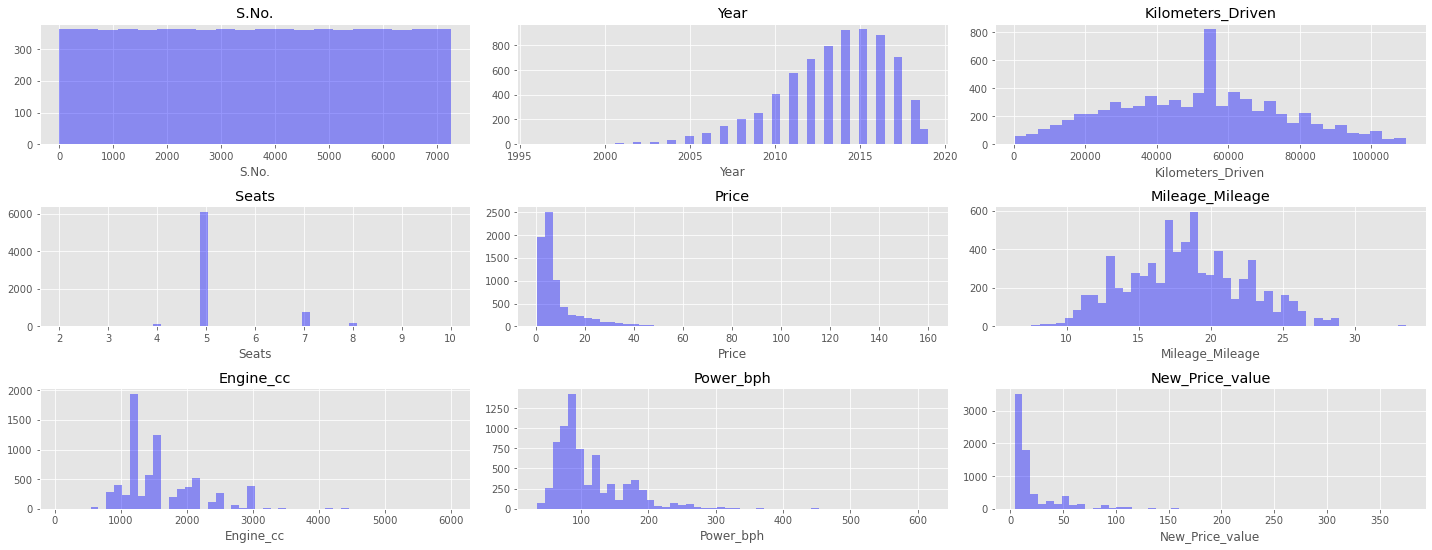

In [84]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df_cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
  
- Year is left skewed and has outilers on lower side., This column can be dropped
- Kilometer_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
- Engine ,power and price are  right skewed and has outliers on upper side.

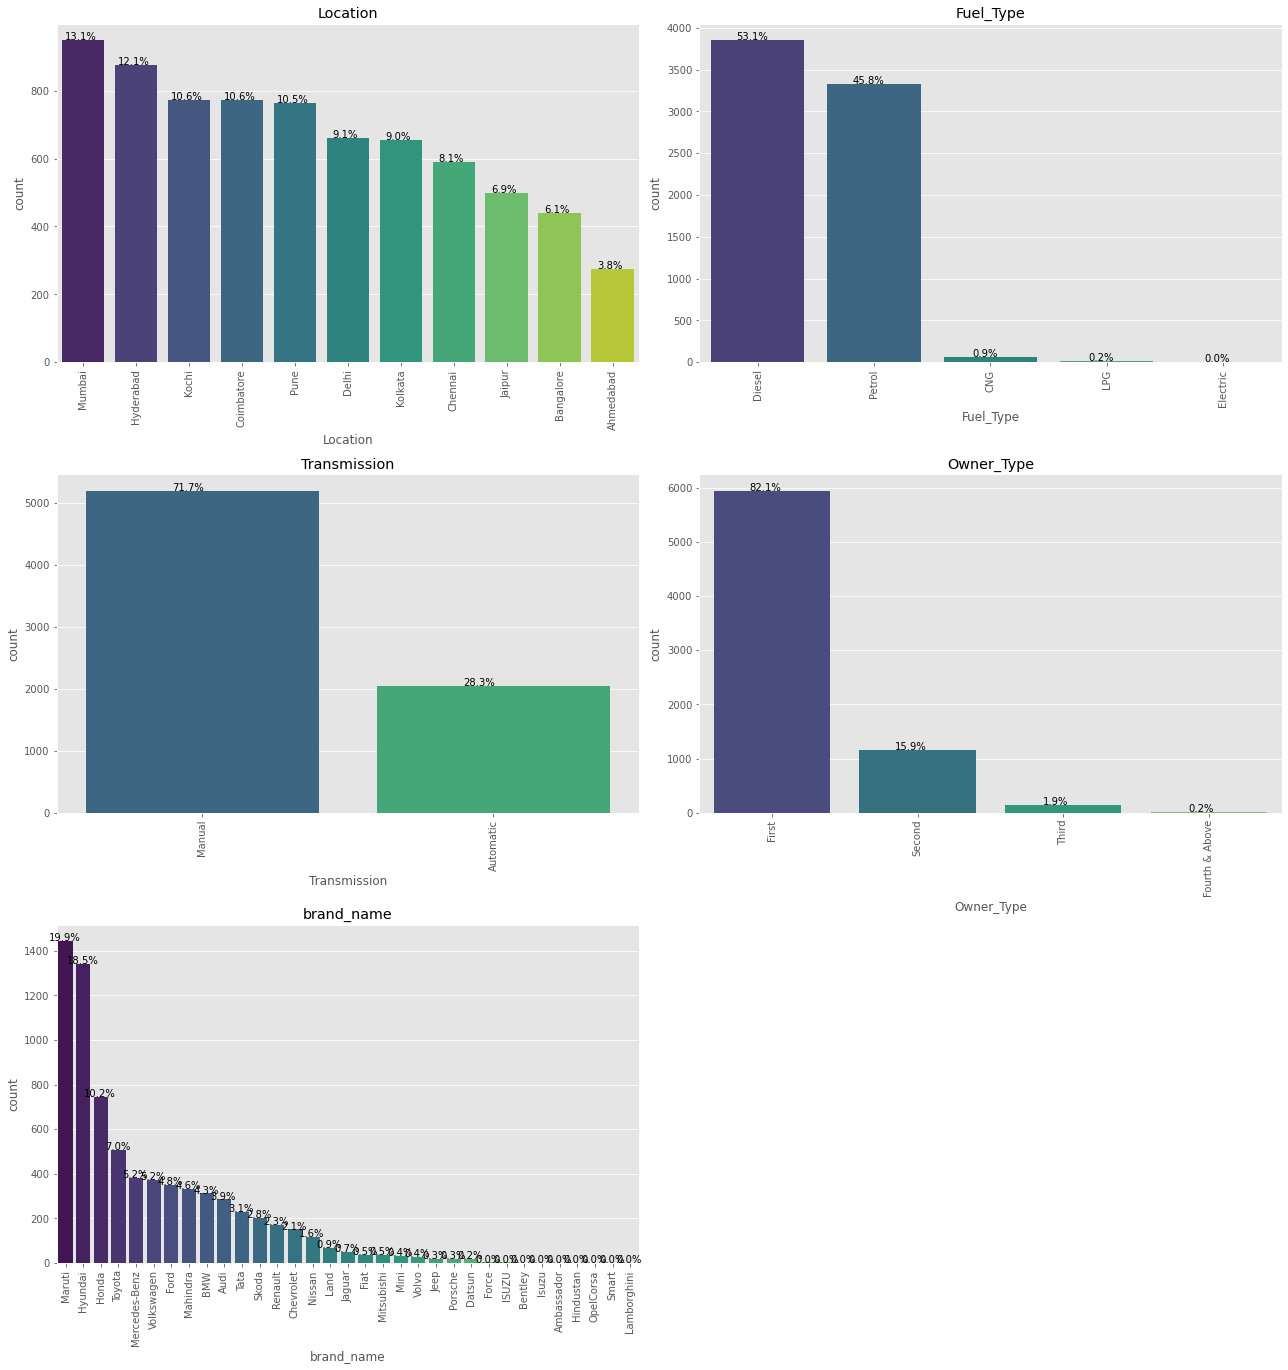

In [85]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'brand_name'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(18,24))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = df_cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=df_cars[variable], data=df_cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
   
   **Car Profile**
    
-  ~71 % cars available for sell have manual Transmission.
- ~82 % cars are First owned cars.
- ~39% of car available for sale are from  Maruti & Hyundai brands.
-  ~53% of car being sold/avialable for purchase  have fuel type as Diesel .
- Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
- Most of the cars are 5 seaters.
- Car being sold/available for purchase are in  2 - 23 years old
- ~ 71% car are lower price range car.

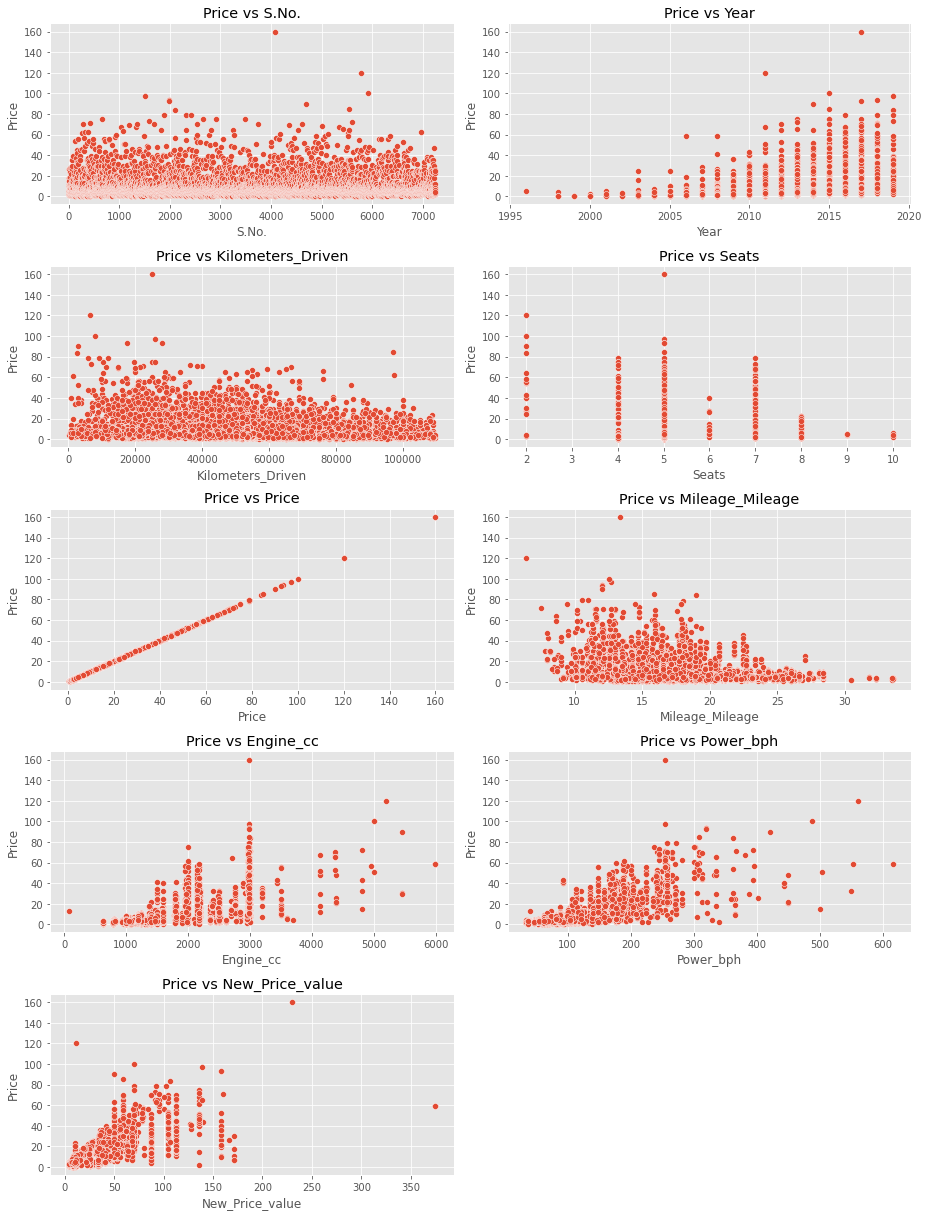

In [86]:
numeric_columns = df_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df_cars[variable],y=df_cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

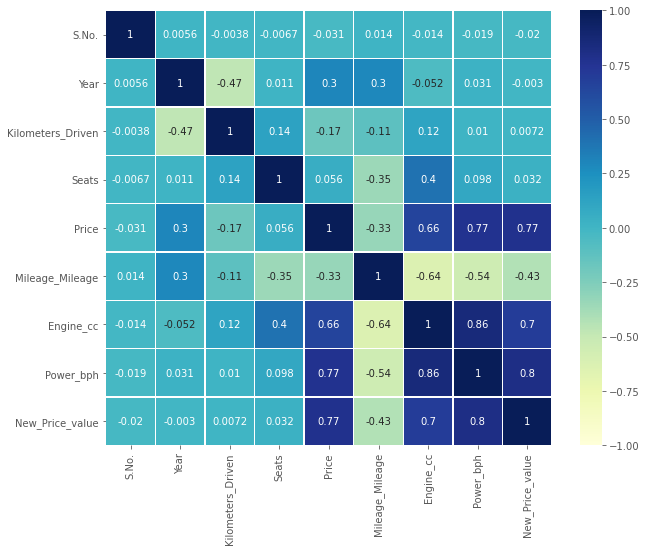

In [87]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data = df_cars.corr(), annot = True, linewidth =0.5, cmap ="YlGnBu",
           cbar =True, vmin = -1, vmax = 1, ax=ax)

plt.show()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

    
- Engine has strong positive correlation to Power [0.86]. 
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,New_Price_Value
- Price has negative  correlation to age of car.
- Kilometer driven doesnt impact Price

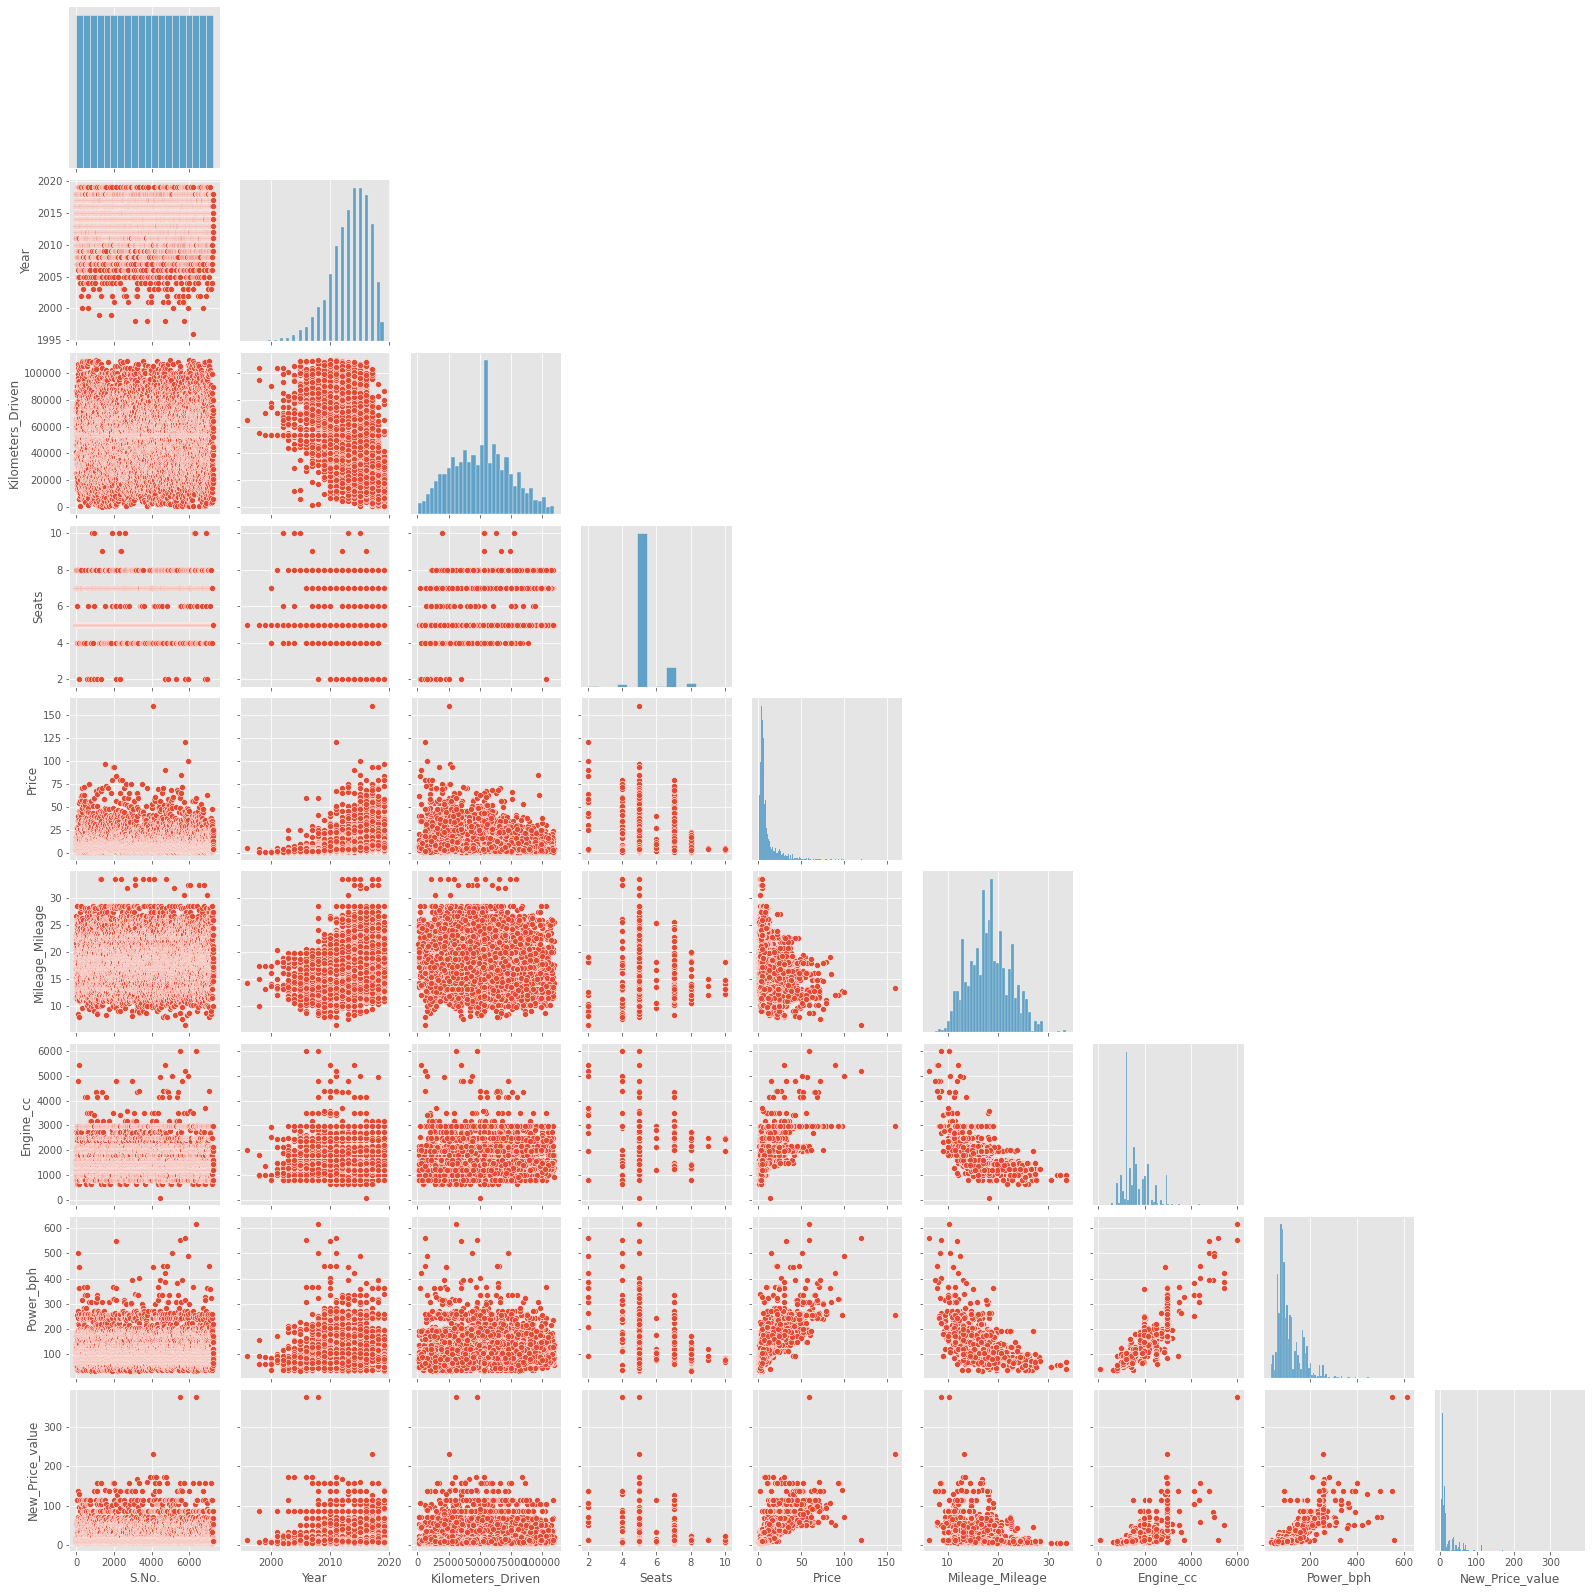

In [88]:
sns.pairplot(data=df_cars , corner=True)
plt.show()

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
- Same observation  about correlation as seen in heatmap.

- Kilometer driven  doesnot have impact on  Price . 
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

### Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

#### Price Vs Engine Vs Transmission

<AxesSubplot:title={'center':'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine_cc'>

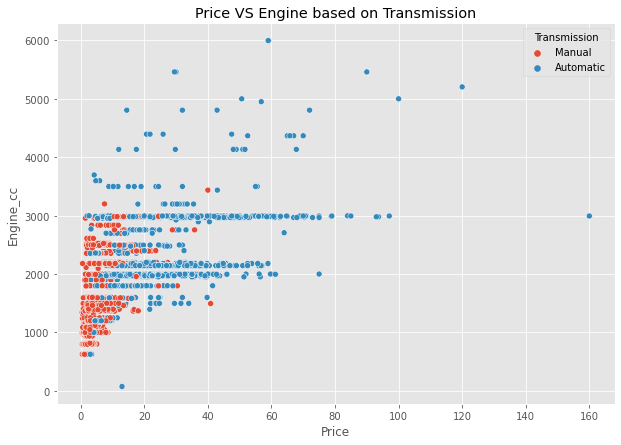

In [89]:
# understand relationship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")

sns.scatterplot(y='Engine_cc', x='Price', hue='Transmission', data=df_cars)

#### Price Vs Power vs Transmission

<AxesSubplot:title={'center':'Price VS Power based on Transmission'}, xlabel='Price', ylabel='Power_bph'>

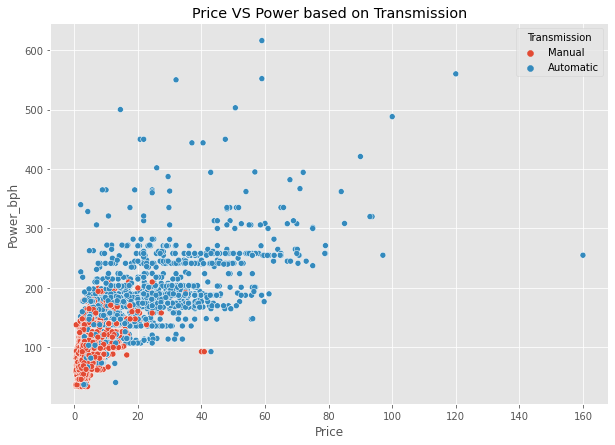

In [90]:
# understand relationship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Power based on Transmission")

sns.scatterplot(y='Power_bph', x='Price', hue='Transmission', data=df_cars)

#### Price Vs Mileage vs Fuel_type

<AxesSubplot:title={'center':'Price VS Power based on Transmission'}, xlabel='Mileage_Mileage', ylabel='Power_bph'>

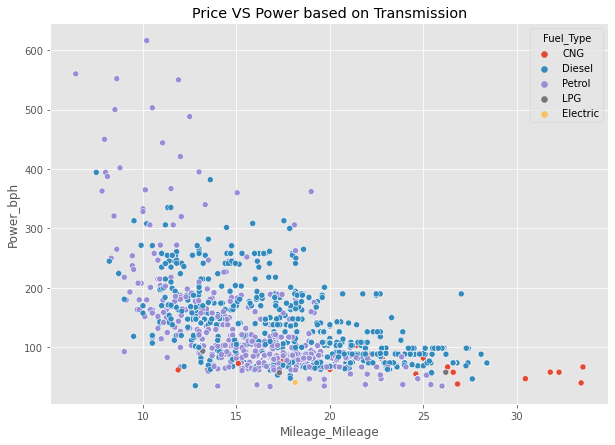

In [91]:
plt.figure(figsize=(10,7))

plt.title("Price VS Power based on Transmission")

sns.scatterplot(y='Power_bph', x='Mileage_Mileage', hue='Fuel_Type', data=df_cars)

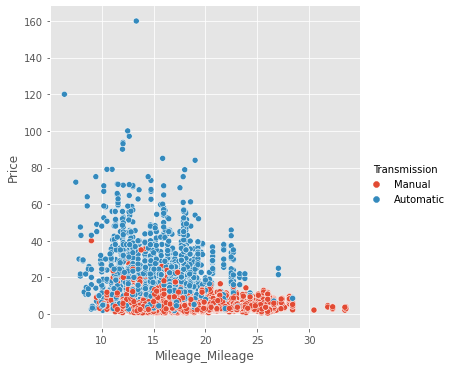

In [92]:
sns.relplot(data=df_cars, y='Price',x='Mileage_Mileage',hue='Transmission',aspect=1,height=5)

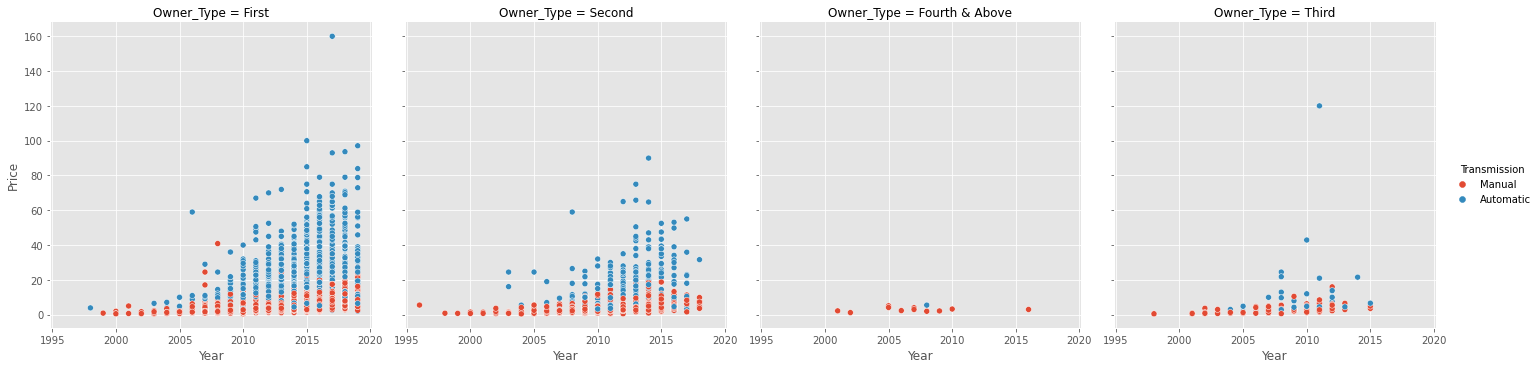

In [93]:
sns.relplot(data=df_cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

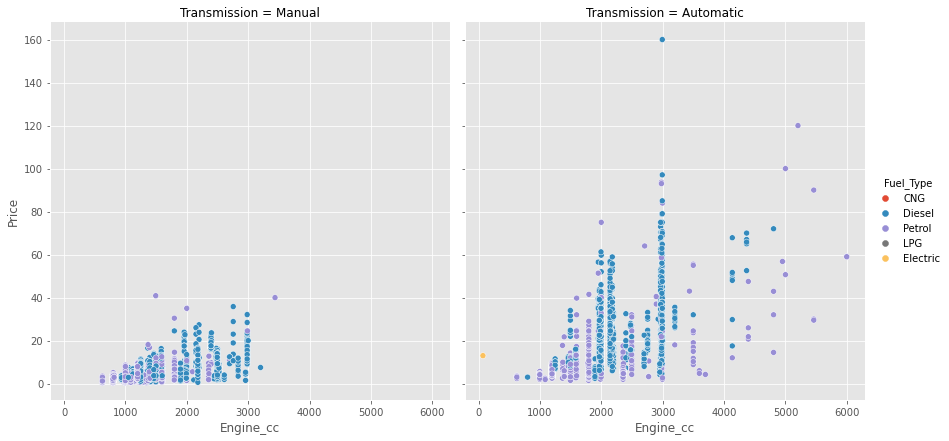

In [94]:
sns.relplot(data=df_cars, y='Price',x='Engine_cc',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

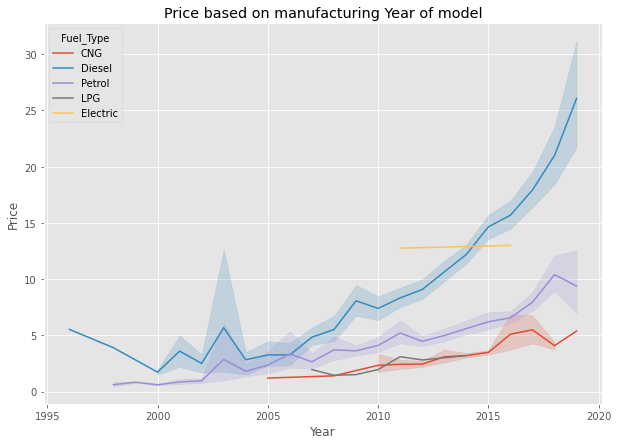

In [95]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price', hue='Fuel_Type', data=df_cars)

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

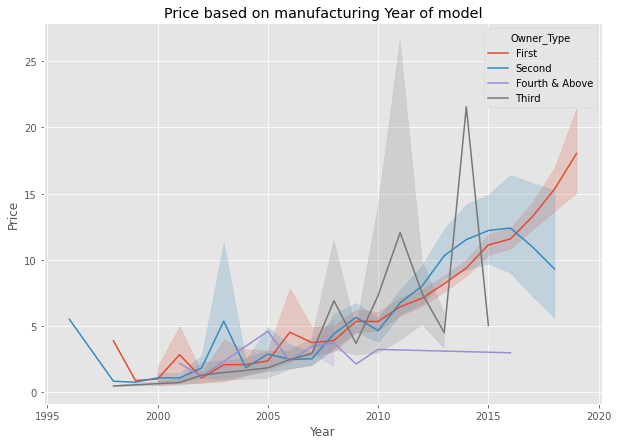

In [96]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price', hue='Owner_Type', data=df_cars)

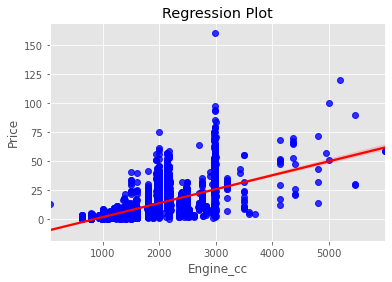

In [97]:
# Plot a Regression plot shows the reation between "New Price" and "Price"
#'x' represent the variable on X=axis
#'y' represent the variable on Y=axis
# data represent the dataframe

sns.regplot(x='Engine_cc', y="Price", data=df_cars, color='Blue', line_kws={"color": "red"})

# add the plot labels
plt.title('Regression Plot')

plt.show()

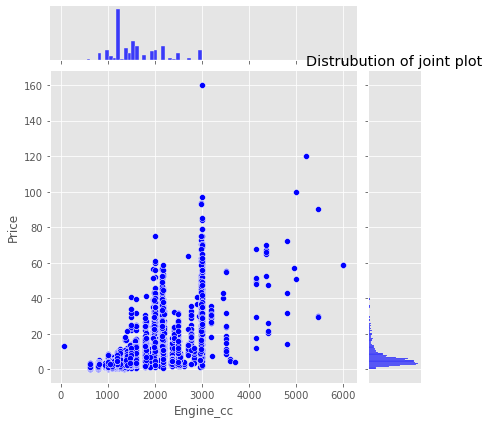

In [98]:
# Joint Plot is a bivariate plot
#'x' represent the variable on X=axis
#'y' represent the variable on Y=axis

sns.jointplot(x="Engine_cc", y="Price", data = df_cars, color='Blue')

# add title
plt.title('Distrubution of joint plot')

plt.show()

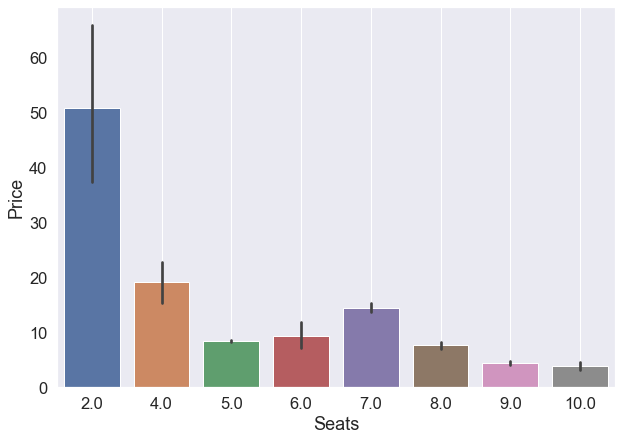

In [99]:
#Price and seats 
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.barplot(x='Seats', y='Price', data=df_cars)
plt.grid()

2 Seater cars are more expensive.

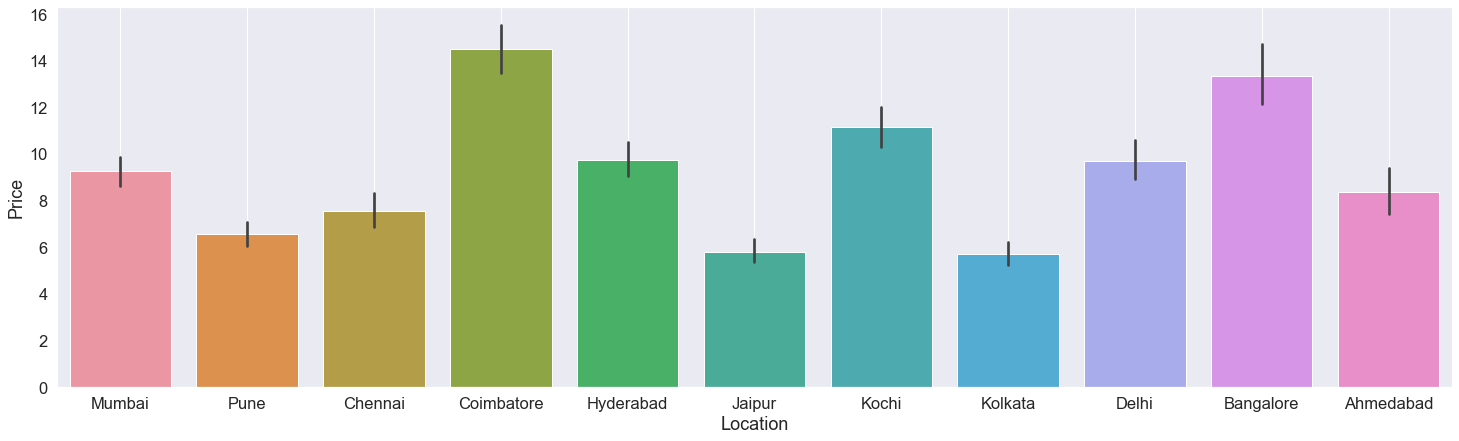

In [100]:
#Price and LOcation 
plt.figure(figsize=(25,7))
sns.set(font_scale=1.5)
sns.barplot(x='Location', y='Price', data=df_cars)
plt.grid()

Expensive cars are in Coimbatore and Banglore.

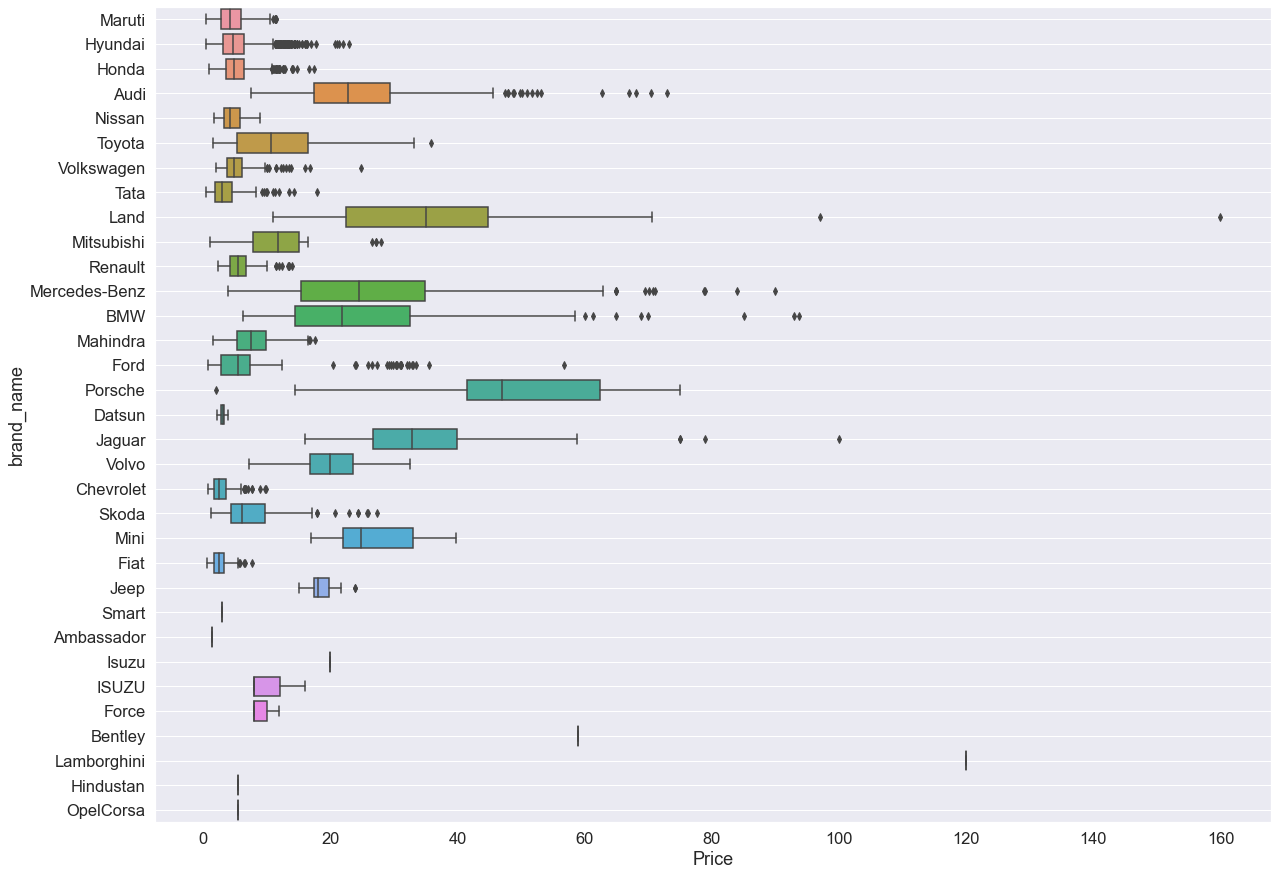

In [101]:
#Price and band name
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
sns.boxplot(x='Price', y='brand_name', data=df_cars)
plt.grid()

# Check Unique values
### See Value count for each categorical data

In [102]:
dd = df_cars.columns[df_cars.dtypes == 'object']

In [103]:
for columns in dd:
    print(df_cars[columns].value_counts())
    print('#' * 40)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Ford Figo 2015-2019 1.5D Ambiente MT     1
Hyundai Santro LP - Euro II              1
Maruti Ritz VXI ABS                      1
BMW 7 Series 730Ld Eminence              1
Toyota Camry 2.5 Hybrid                  1
Name: Name, Length: 2041, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Manual       5204
Autom

In [104]:
df_cars['model_name'].value_counts()[:50]

Swift        418
City         318
i20          303
Innova       203
Verna        200
Grand        183
Alto         183
i10          181
Wagon        178
Polo         178
XUV500       131
Vento        129
Amaze        127
New          119
Fortuner     118
Creta        118
Figo         112
3            109
E-Class      108
Duster        97
Santro        95
A4            90
5             86
Ertiga        86
Corolla       83
Ciaz          83
Brio          80
Etios         80
EON           79
Ritz          78
Baleno        75
Jazz          70
Scorpio       69
Xcent         68
Rover         67
Ecosport      67
Celerio       66
A6            66
Superb        58
Rapid         58
Vitara        55
Beat          54
Indica        54
EcoSport      50
Fiesta        49
Micra         45
SX4           44
KWID          44
Endeavour     43
Civic         39
Name: model_name, dtype: int64

# Outliers

In [105]:
df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph,New_Price_value,New_Price_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,...,NaN,1.75,26.60,kmpl,Maruti,Wagon,998.0,58.16,5.29,Lakh
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,...,NaN,12.50,19.67,kmpl,Hyundai,Creta,1582.0,126.20,18.32,Lakh


In [106]:
df_cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                   0
New_Price            6247
Price                   0
Mileage_Mileage         0
Mileage_Unit            0
brand_name              0
model_name              0
Engine_cc               0
Power_bph               0
New_Price_value         0
New_Price_unit          0
dtype: int64

In [107]:
df_cars.drop(['Mileage', 'Engine', 'Power', 'New_Price', 'New_Price_value'], axis=1, inplace=True)
df_cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Mileage,Mileage_Unit,brand_name,model_name,Engine_cc,Power_bph,New_Price_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,5.0,1.75,26.60,kmpl,Maruti,Wagon,998.0,58.16,Lakh
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,5.0,12.50,19.67,kmpl,Hyundai,Creta,1582.0,126.20,Lakh


In [108]:
# see only numeric columns
numeric_columns = df_cars.select_dtypes(include=np.number)
numeric_columns.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price',
       'Mileage_Mileage', 'Engine_cc', 'Power_bph'],
      dtype='object')

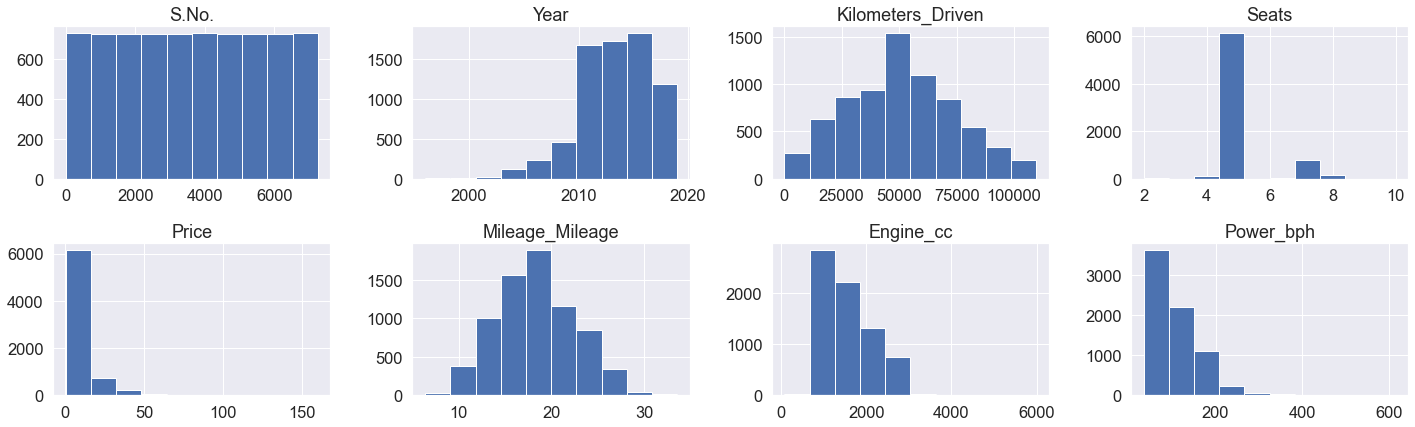

In [109]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                    plt.subplot(10,4,i+1)
                    plt.hist(df_cars[variable])
                    plt.tight_layout()
                    plt.title(variable)
plt.show()

In [110]:
# While doing uni-varient analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us to create boxplot and histogram for any input numerical variable.
# This function taken the numerical columns as the input and returns the boxplots and histogram for the veriable.
# Let us see if this help us to write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15,10), bins=None):
    """Boxplot and Histogram combined
    feature: 1-d feature array
    feature: size of fig (default (9,8))
    bins: number of bins(default None/Auto)
    """

    sns.set(font_scale=2) #setting the font scale of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, #Number of rowsa of the subplot grid=2
                                           sharex = True, #x-axis will be sheared among all subplots
                                            gridspec_kw = {"height_ratios": (0.25, 0.75)},
                                            figsize = figsize
                                            ) # Creating the 2 subplots

    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will br created and a start will indicates
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2 )
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.mean(feature), color='black', linestyle='-') # add median to the histogram

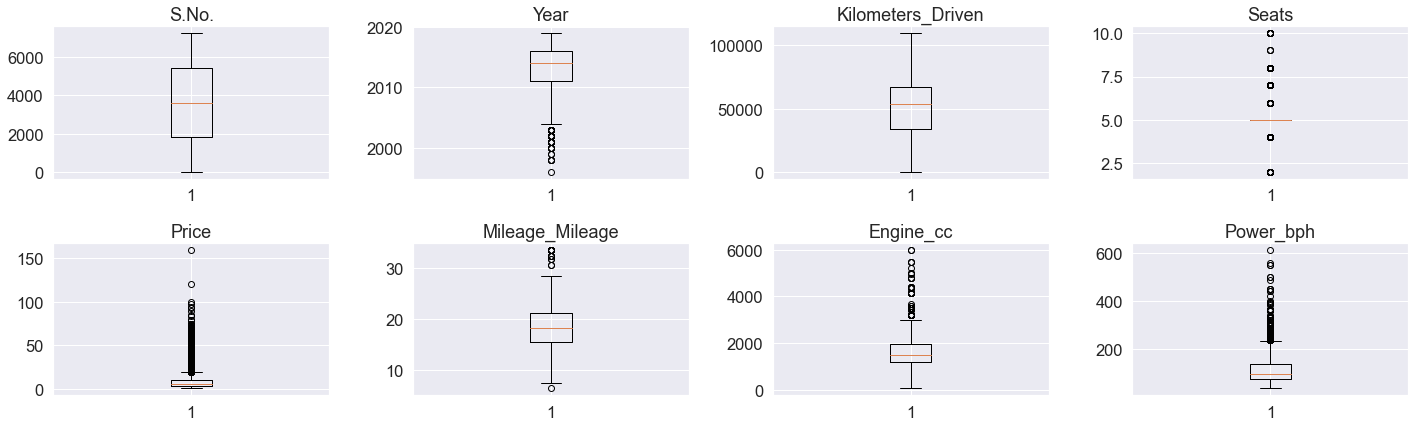

In [111]:
# Outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                    plt.subplot(10,4,i+1)
                    plt.boxplot(df_cars[variable], whis=1.5)
                    plt.tight_layout()
                    plt.title(variable)
plt.show()  

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

- As we see there is so mane outliers are present in the data. 
- We need to fix the outliers by using clip method.
- "Year" and "Seats" are the most inportant columns. So, we can not remove the outliers. 

## Outlier by clip method

In [112]:
outlier_column=['Mileage_Mileage', 'Engine_cc', 'Power_bph']

In [113]:
#define function for adding outliers into whisker
def LRwhisker(outlier_column):
    q1=df_cars[outlier_column].quantile(0.25)
    q3=df_cars[outlier_column].quantile(0.75)
    IQR=q3-q1
    
    Q1 = q1-1.5*IQR
    Q3 = q3+1.5*IQR
    df_cars[outlier_column]=np.clip(df_cars[outlier_column],Q1,Q3)


for i in outlier_column:
    LRwhisker(i)


## Check Outlier are removed or not

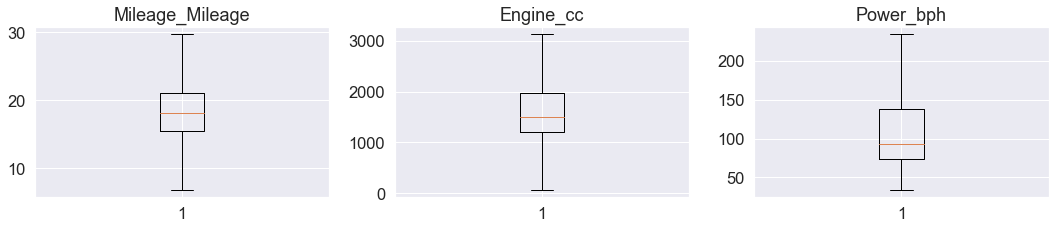

In [114]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(outlier_column):
                    plt.subplot(10,4,i+1)
                    plt.boxplot(df_cars[variable], whis=1.5)
                    plt.tight_layout()
                    plt.title(variable)
plt.show()  

# Model building

In [115]:
df_cars.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage_Mileage',
       'Mileage_Unit', 'brand_name', 'model_name', 'Engine_cc', 'Power_bph',
       'New_Price_unit'],
      dtype='object')

* For model building we need to drop the unwanted columns for more accuracy purpose

In [116]:
# Define x and y variable
x = df_cars.drop(['S.No.','Name','Price','New_Price_unit'], axis=1)
y = df_cars[['Price']]

print(x.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010            72000.0       CNG       Manual      First   
1        Pune  2015            41000.0    Diesel       Manual      First   
2     Chennai  2011            46000.0    Petrol       Manual      First   
3     Chennai  2012            87000.0    Diesel       Manual      First   
4  Coimbatore  2013            40670.0    Diesel    Automatic     Second   

   Seats  Mileage_Mileage Mileage_Unit brand_name model_name  Engine_cc  \
0    5.0            26.60         kmpl     Maruti      Wagon      998.0   
1    5.0            19.67         kmpl    Hyundai      Creta     1582.0   
2    5.0            18.20         kmpl      Honda       Jazz     1199.0   
3    7.0            20.77         kmpl     Maruti     Ertiga     1248.0   
4    5.0            15.20         kmpl       Audi         A4     1968.0   

   Power_bph  
0      58.16  
1     126.20  
2      88.70  
3      88.76  
4     140.80  
  

In [117]:
print(x.shape)
print(y.shape)

(7253, 13)
(7253, 1)


* Now we've got our data split into training and test sets, it's time to build a machine learning model.

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set.

## Create Dummies by One-Hot coding method

In [118]:
char_dummies = x.columns[x.dtypes == 'object']

char_dummies

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_Unit',
       'brand_name', 'model_name'],
      dtype='object')

In [119]:
x = pd.get_dummies(x, columns=char_dummies, drop_first=True)

x.head()

,Year,Kilometers_Driven,Seats,Mileage_Mileage,Engine_cc,Power_bph,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,model_name_Xcent,model_name_Xenon,model_name_Xylo,model_name_Yeti,model_name_Z4,model_name_Zen,model_name_Zest,model_name_i10,model_name_i20,model_name_redi-GO
0,2010,72000.0,5.0,26.60,998.0,58.16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,5.0,19.67,1582.0,126.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,5.0,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,7.0,20.77,1248.0,88.76,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,5.0,15.20,1968.0,140.80,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into train and test

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [122]:
x_train.head()

,Year,Kilometers_Driven,Seats,Mileage_Mileage,Engine_cc,Power_bph,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,model_name_Xcent,model_name_Xenon,model_name_Xylo,model_name_Yeti,model_name_Z4,model_name_Zen,model_name_Zest,model_name_i10,model_name_i20,model_name_redi-GO
3181,2014,52000.0,5.0,22.50,998.0,67.04,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
952,2018,92056.0,7.0,13.68,2393.0,147.80,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2266,2009,53416.0,7.0,11.50,2982.0,171.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,2017,43775.0,7.0,20.77,1248.0,88.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7213,2013,53416.0,5.0,22.30,1248.0,74.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Choose Model, Train and Evaluate

In [123]:
# fitting linear model

from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()

linearregression.fit(x_train, y_train)

LinearRegression()

In [124]:
print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCoefficients of the equation are:", linearregression.coef_)

Intercept of the linear equation: [-1904.45246885]

Coefficients of the equation are: [[ 9.50023019e-01 -3.44652475e-05  7.81171890e-01 -9.53434721e-02
  -3.19604870e-04  6.15279845e-02  2.00434810e+00  1.06487991e+00
   1.67797263e+00 -4.56672409e-01  1.37989531e+00  7.78659363e-01
   3.08748827e-02 -8.14376796e-01 -1.65625413e-01  3.23598157e-01
   1.68132773e+00  5.46573251e+00 -3.63684643e-01 -1.86025256e-01
  -1.47663069e-01  2.07882166e+00 -4.14484965e-01  2.96473994e-01
   4.46758548e+00 -4.67953114e+00  2.12289920e+01 -9.16319797e+00
  -1.02291678e+01 -8.78660754e+00 -5.34593661e+00 -4.68757946e+00
   2.44588350e-10 -9.92654030e+00 -7.31040521e+00 -7.43731439e+00
  -3.39283527e+00  2.48679661e+01 -3.42660284e+00  5.01065737e+01
   8.84972794e+00 -1.01230611e+01 -8.45270204e+00  7.86820032e+00
   5.68417849e+00 -5.62703893e+00 -8.92153379e+00 -6.22328736e-01
   2.14281803e+01 -9.69602085e+00 -6.92116238e+00  3.63775676e-11
  -5.90900632e+00 -5.79030283e+00 -6.24764887e+00 -1.804

## Predict Value

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [126]:
pred_train = linearregression.predict(x_train)

pred_test = linearregression.predict(x_test)

In [127]:
pred_train

array([[ 5.70153505],
       [17.87689995],
       [14.2196199 ],
       ...,
       [ 9.49207282],
       [ 4.46029678],
       [ 6.12985536]])

In [128]:
pred_test

array([[ 6.12283947],
       [ 4.70337936],
       [ 6.29330022],
       ...,
       [ 2.60305585],
       [ 2.78498111],
       [15.87838325]])

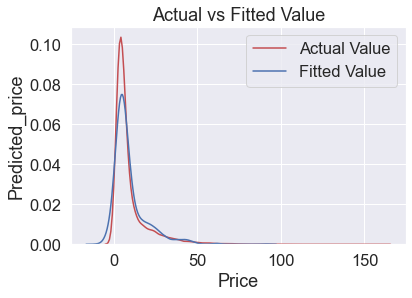

In [129]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df_cars['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(pred_test, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.legend()
plt.show()

## Lets look at the model Performances

In [130]:
# Mean Absolute Error on test
print(mean_absolute_error(y_train, pred_train))
print(mean_absolute_error(y_test, pred_test))

2.25802371786769
2.3798724828515505


In [131]:
# RMSE 
print(mean_squared_error(y_train, pred_train)**0.5)
print(mean_squared_error(y_test, pred_test)**0.5)

4.264638187992002
4.30920244279681


In [132]:
# R2 Squared
print(r2_score(y_test, pred_test))  # testing data
print(r2_score(y_train, pred_train)) # train data

0.8265519373668875
0.8515717387096531


In [133]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_train, pred_train)
mape_test = mean_absolute_percentage_error(y_test, pred_test)
print(mape)
print(mape_test)

0.4261379487233639
0.4516401784635503


# Lets see r_square with Stats Model

In [134]:
# Let us build linear regression model using statsmodel

x = sm.add_constant(x)
x_train1, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

olsmodel0 = sm.OLS(y_train, x_train1)
olsres0 = olsmodel0.fit()

print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:02:10   Log-Likelihood:                -14567.
No. Observations:                5077   AIC:                         2.960e+04
Df Residuals:                    4845   BIC:                         3.111e+04
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Multi-collinearity

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif_series1 = pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])], index=x_train1.columns)

print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                  0.000000
Year                   2.911954
Kilometers_Driven      1.759905
Seats                 16.682746
Mileage_Mileage        7.575097
                        ...    
model_name_Zen              inf
model_name_Zest             inf
model_name_i10              inf
model_name_i20              inf
model_name_redi-GO          inf
Length: 275, dtype: float64



### Creating formula for removing columns which has VIF value > 5

In [137]:
# Creating formula for removing columns which has VIF value > 5

def calculate_vif_(X,thresh=5.0):
    variables=list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif=[variance_inflation_factor(X.iloc[:, variables].values, ix)
             for ix in range(X.iloc[:, variables].shape[1])]
       
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
           
           
    print("Remaining variables:")
    print(X.columns[variables])
    return X.iloc[:, variables] 

In [138]:
x_train2 = calculate_vif_(x_train1)

Dropping 'Fuel_Type_Electric' at index: 18
Dropping 'brand_name_Audi' at index: 24
Dropping 'brand_name_BMW' at index: 24
Dropping 'brand_name_Bentley' at index: 24
Dropping 'brand_name_Chevrolet' at index: 24
Dropping 'brand_name_Datsun' at index: 24
Dropping 'brand_name_Fiat' at index: 24
Dropping 'brand_name_Force' at index: 24
Dropping 'brand_name_Ford' at index: 24
Dropping 'brand_name_Honda' at index: 25
Dropping 'brand_name_Hyundai' at index: 25
Dropping 'brand_name_ISUZU' at index: 25
Dropping 'brand_name_Isuzu' at index: 25
Dropping 'brand_name_Jaguar' at index: 25
Dropping 'brand_name_Jeep' at index: 25
Dropping 'brand_name_Lamborghini' at index: 25
Dropping 'brand_name_Land' at index: 25
Dropping 'brand_name_Mahindra' at index: 25
Dropping 'brand_name_Mini' at index: 27
Dropping 'brand_name_Mitsubishi' at index: 27
Dropping 'brand_name_Nissan' at index: 27
Dropping 'brand_name_OpelCorsa' at index: 27
Dropping 'brand_name_Porsche' at index: 27
Dropping 'brand_name_Renault' at

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])], index=x_train2.columns)

print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

Location_Bangalore     0.464749
Location_Chennai       1.301236
Location_Coimbatore    0.324388
Location_Delhi         1.607297
Location_Hyderabad     0.574943
                         ...   
model_name_Zen         1.140103
model_name_Zest        1.106577
model_name_i10         1.737931
model_name_i20         2.144162
model_name_redi-GO     1.035900
Length: 235, dtype: float64



In [140]:
sort = vif_series1.sort_values(ascending=False)[:20]
sort

model_name_City        2.265339
model_name_i20         2.144162
model_name_Wagon       1.895921
model_name_Alto        1.820355
model_name_Grand       1.816986
model_name_Verna       1.769710
model_name_Innova      1.742751
model_name_i10         1.737931
model_name_Polo        1.644112
Location_Delhi         1.607297
model_name_Vento       1.540544
Location_Kolkata       1.483469
model_name_New         1.467275
model_name_XUV500      1.448494
model_name_Fortuner    1.446337
model_name_Amaze       1.434299
model_name_E-Class     1.424665
model_name_Santro      1.419559
model_name_Brio        1.403170
model_name_Creta       1.398952
dtype: float64

## Build a Stats Model

In [141]:
# see summery

olsmodel1 = sm.OLS(y_train, x_train2)
olsres1 = olsmodel1.fit()

print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              158.2
Date:                Sun, 16 Jan 2022   Prob (F-statistic):                        0.00
Time:                        13:33:07   Log-Likelihood:                         -15460.
No. Observations:                5077   AIC:                                  3.136e+04
Df Residuals:                    4857   BIC:                                  3.280e+04
Df Model:                         220                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## Drop Columns who have p value more than 0.05

## Creating formula for removing columns which has p value > 0.05

In [142]:
cols = x_train2.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    # Defining the train set
    x_train2_aux = x_train2[cols]
    # fitting model
    model = sm.OLS(y_train, x_train2_aux).fit()
    # Getting the p-value and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
           

selected_features = cols
print(selected_features)

['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Petrol', 'Owner_Type_Second', 'Owner_Type_Third', 'model_name_3', 'model_name_5', 'model_name_6', 'model_name_7', 'model_name_A', 'model_name_A3', 'model_name_A4', 'model_name_A6', 'model_name_A7', 'model_name_Accord', 'model_name_Alto', 'model_name_Amaze', 'model_name_Ameo', 'model_name_Aspire', 'model_name_B', 'model_name_BR-V', 'model_name_BRV', 'model_name_Baleno', 'model_name_Beetle', 'model_name_Bolero', 'model_name_Brio', 'model_name_C-Class', 'model_name_CLA', 'model_name_CR-V', 'model_name_Camry', 'model_name_Captur', 'model_name_Cayenne', 'model_name_Cayman', 'model_name_Celerio', 'model_name_Ciaz', 'model_name_City', 'model_name_Civic', 'model_name_Clubman', 'model_name_Compass', 'model_name_Continental', 'model_name_Cooper', 'model_name_Corolla', 'model_name_Creta', 'model_name_Cruze', 'model_name_Duster'

In [143]:
# see summery

olsmodel1 = sm.OLS(y_train, x_train2_aux)
olsres1 = olsmodel1.fit()

print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              226.0
Date:                Sun, 16 Jan 2022   Prob (F-statistic):                        0.00
Time:                        13:33:20   Log-Likelihood:                         -15520.
No. Observations:                5077   AIC:                                  3.134e+04
Df Residuals:                    4925   BIC:                                  3.234e+04
Df Model:                         152                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Checking assumptions</b></p>

* Linearity: between actual and predicted value should be 45 degree.
* Normality of errors: Equal distributions of errors on both the sides. 
* Homoscedasticity: Constant variance of errors (Mean of errors Should be Zero)
  * Test of Homoscedasticity: 
        * Goldfeld Quandt test -Used in regression analysis.
        * Jarkbera test- Normality test. p should be more than 0.05 for Homoscedasticity
* Endigenity: Errors should be free from x veriables.
* Data should be normalized.

# Mean of Rsudual 

In [144]:
# Calaculating Error Mean 
residual = olsres1.resid
np.mean(residual)

0.16048183522336743

### Test

In [145]:
residual = olsres1.resid
fitted = olsres1.fittedvalues  #predicted values

In [146]:
fitted[0:5]

3181     3.785281
952     15.120956
2266    17.821115
1504     8.645451
7213     2.132466
dtype: float64

###  Residuals of linear regression
This function will regress y on x (possibly as a robust or polynomial regression).

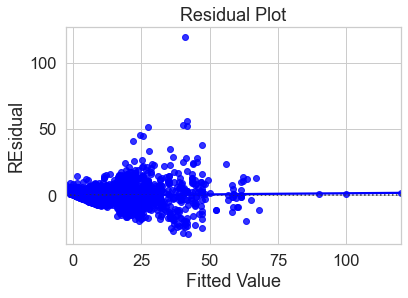

In [147]:
# residplot() : This method is used to plot the residuals of linear regression.

sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="blue", lowess=True)
plt.xlabel("Fitted Value")
plt.ylabel("REsidual")
plt.title("Residual Plot")
plt.show()

### Distribution plot
Putting above residual plot in histogram.

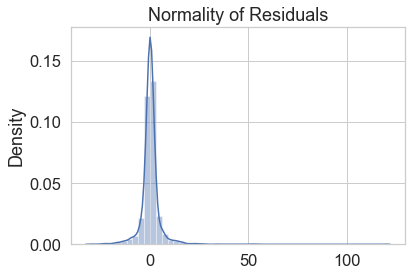

In [148]:
sns.distplot(residual)
plt.title("Normality of Residuals")
plt.show()

### Probplot
Probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

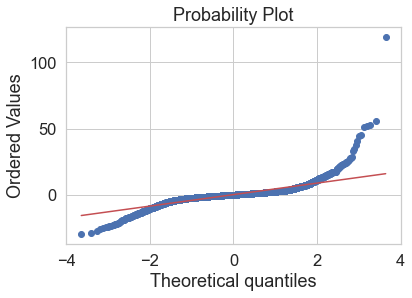

In [149]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

# Test for Homoscedasticity
### Null Hypothesis : Residuals are homoscedastic
### Alternate hypothesis: Residuals are heteroscedasticity

In [150]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Fstatistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train2_aux)
lzip(name, test)

[('Fstatistic', 1.034737458143866), ('p-value', 0.201550738871743)]

In [151]:
x_test_final = x_test[x_train2_aux.columns]

x_test_final

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Owner_Type_Second,...,model_name_XF,model_name_XJ,model_name_XUV500,model_name_Xcent,model_name_Xylo,model_name_Yeti,model_name_Z4,model_name_Zest,model_name_i10,model_name_i20
2954,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6520,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6036,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6735,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7013,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
y_pred = olsres1.predict(x_test_final)

In [153]:
y_pred[:5]

2954    3.035003
6520    1.478245
6036    1.940891
6251    3.720375
6735    8.377773
dtype: float64

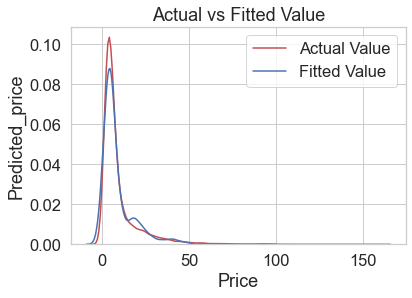

In [154]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df_cars['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.legend()
plt.show()

## Checking the performance on train and test: metric used -RMSE

In [155]:
#checking RMSE on both train and test set
#difference should be less between both

from sklearn.metrics import mean_squared_error
rms=np.sqrt(mean_squared_error(y_train,fitted))
print('Train error1:',rms)

rms1=np.sqrt(mean_squared_error(y_test,y_pred))
print('test error:',rms1)

Train error1: 5.145000545647497
test error: 5.585062248780454


In [156]:
# R2 Squared
print(r2_score(y_train,fitted))
print(r2_score(y_test, y_pred))  # testing data

0.783965522239528
0.7086388152475169


In [157]:
# Mean Absolute Error on test
print(mean_absolute_error(y_train,fitted))
print(mean_absolute_error(y_test, y_pred))

2.7303864219715392
2.915560441232972


In [158]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_train, fitted)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
print(mape_test)

0.402354416475726
0.407959946901964


# Report Table

In [159]:
output = {'MODEL':['Sk-Learn','Stats'],
          'Train_r_square_score':[0.851, 0.783],
          'Test_r_square_score':[0.826, 0.708],
          'Train_mean_absolute_error':[2.258, 2.730],
          'Test_mean_absolute_error':[2.379, 2.915],
         'Train_mean_absolute_percentage_error':[0.426,0.402],
         'Test_mean_absolute_percentage_error':[0.451,0.407]}

# Data = pd.DataFrame(output)
Data.head()

 <p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Conclusion</b></p>
    
- It seems that the results for Sk-learn model have better performance than Stats Model. 